In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost

In [2]:
tdata = pd.read_csv(r"E:\AV\LMS\Train_Fyxd0t8.csv")

In [3]:
tdata.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0,0,1,0
1,F00000003,209,1,0,1,0,0,0,2,1
2,F00000004,257,1,0,1,0,0,0,2,1
3,F00000005,257,1,1,1,0,0,0,2,1
4,F00000006,342,1,0,1,0,0,0,2,1


In [4]:
tdata.columns

Index([u'ID', u'Estimated_Insects_Count', u'Crop_Type', u'Soil_Type',
       u'Pesticide_Use_Category', u'Number_Doses_Week', u'Number_Weeks_Used',
       u'Number_Weeks_Quit', u'Season', u'Crop_Damage'],
      dtype='object')

In [246]:
%matplotlib inline

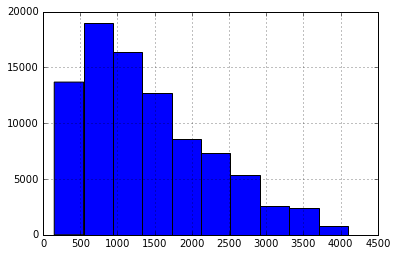

In [247]:
tdata.Estimated_Insects_Count.hist()

In [8]:
from unbalanced_dataset import SMOTE

In [9]:
tdata.Crop_Damage.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [248]:
ratio = float(np.count_nonzero(tdata.Crop_Damage==2)) / float(np.count_nonzero(tdata.Crop_Damage==1))

In [249]:
x = tdata.drop(['Crop_Damage'],axis=1)

In [250]:
y = tdata['Crop_Damage']

In [13]:
smote = SMOTE(ratio=ratio, verbose=False, kind='regular')
smox, smoy = smote.fit_transform(x, y)

In [251]:
tdata.isnull().any()

ID                         False
Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used           True
Number_Weeks_Quit          False
Season                     False
Crop_Damage                False
dtype: bool

In [3]:
tdata.Number_Weeks_Used.fillna(tdata.Number_Weeks_Used.mean(),inplace=True)
tdata["Amount_of_Pest"] = tdata["Number_Doses_Week"] * tdata["Number_Weeks_Used"]

In [4]:
tdata["Ratio"] = tdata["Estimated_Insects_Count"] / tdata["Amount_of_Pest"]

In [5]:
tdata = tdata.replace([np.inf, -np.inf], np.nan)

In [6]:
tdata.Ratio.fillna(tdata.Ratio.mean(),inplace=True)

In [130]:
#tdata.Amount_of_Pest.fillna(tdata.Amount_of_Pest.mean(),inplace=True)

In [196]:
tdata.Number_Weeks_Used.mean()

28.648364456698836

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Create some toy data in a Pandas dataframe
fruit_data = pd.DataFrame({
    'fruit':  ['apple','orange','pear','orange'],
    'color':  ['red','orange','green','green'],
    'weight': [5,6,3,4]
})

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [8]:
train = MultiColumnLabelEncoder(columns = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season','Crop_Damage']).fit_transform(tdata)

In [9]:
train.columns

Index([u'ID', u'Estimated_Insects_Count', u'Crop_Type', u'Soil_Type',
       u'Pesticide_Use_Category', u'Number_Doses_Week', u'Number_Weeks_Used',
       u'Number_Weeks_Quit', u'Season', u'Crop_Damage', u'Amount_of_Pest',
       u'Ratio'],
      dtype='object')

In [10]:
train_data = train.drop(['ID','Crop_Damage'],axis=1).as_matrix()

In [60]:
train.columns

Index([u'ID', u'Estimated_Insects_Count', u'Crop_Type', u'Soil_Type',
       u'Pesticide_Use_Category', u'Number_Doses_Week', u'Number_Weeks_Used',
       u'Number_Weeks_Quit', u'Season', u'Crop_Damage', u'Amount_of_Pest',
       u'Ratio'],
      dtype='object')

In [11]:
train_res = train['Crop_Damage'].as_matrix()

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
forest_g = RandomForestClassifier(n_estimators = 100,max_features = 3,oob_score=True,n_jobs=-1,criterion='gini')

In [14]:
forest_e = RandomForestClassifier(n_estimators = 100,max_features = 3,oob_score=True,n_jobs=-1,criterion='entropy')

In [15]:
from sklearn import svm

In [16]:
clf = svm.SVC(kernel='rbf', C = 1.0)

In [17]:
import xgboost

In [18]:
XGGG_train = xgboost.DMatrix(train_data,train_res)
param = {'max_depth':15, 'learning_rate':0.03 ,'colsample_bytree':0.8,'min_child_weight' : 10 ,'subsample' : 0.7,'num_class': 3}
param['objective'] = 'multi:softprob'

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf1 = DecisionTreeClassifier()

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
clfE_g = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion='gini')

In [17]:
clfE_e = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion='entropy')

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
clf_Grad = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=50)

In [20]:
from sklearn.ensemble import VotingClassifier


In [21]:
eclf = VotingClassifier(estimators=[('forest_g', forest_g), ('forest_e', forest_e),('clfE_g',clfE_g),('clfE_e', clfE_e),('clf_Grad',clf_Grad)], voting='hard')

In [42]:
forest_g_r = forest_g.fit(train_data,train_res)

In [43]:
clfE_g_r = clfE_g.fit(train_data,train_res)

In [44]:
clf_Grad_r = clf_Grad.fit(train_data,train_res)

In [49]:
test_probs = (0.2*forest_g_r.predict_proba(test_fin)[:]) + (0.3*bst.predict(XG_Test_fin)) + (0.25*clfE_g_r.predict_proba(test_fin)[:]) + (0.25*clf_Grad_r.predict_proba(test_fin)[:]) 

In [54]:
forest_g_r.feature_importances_


array([ 0.1747525 ,  0.02030462,  0.03778831,  0.0322086 ,  0.04672573,
        0.13769503,  0.13139028,  0.08115082,  0.12490034,  0.21308378])

In [59]:
clf_Grad_r.feature_importances_


array([ 0.16902711,  0.03635928,  0.01797341,  0.12927353,  0.10609305,
        0.20465226,  0.04811339,  0.02043101,  0.11084715,  0.15722981])

In [48]:
0.2*forest_g_r.predict_proba(test_fin)[:]

array([[ 0.008     ,  0.192     ,  0.        ],
       [ 0.00066667,  0.19933333,  0.        ],
       [ 0.006     ,  0.194     ,  0.        ],
       ..., 
       [ 0.1       ,  0.1       ,  0.        ],
       [ 0.154     ,  0.046     ,  0.        ],
       [ 0.118     ,  0.082     ,  0.        ]])

In [22]:
forest.fit(train_data,train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [ ]:
clf.fit(train_data,train_res)

In [22]:
voting = eclf.fit(train_data,train_res)

In [29]:
ans = voting.predict(test_fin)

In [16]:
forest = forest.fit(train_data,train_res)

In [151]:
from sklearn.cross_validation import KFold,cross_val_score

In [152]:
kf = KFold(n = train_data.shape[0],n_folds = 10)

In [24]:
test = pd.read_csv(r"E:\AV\LMS\Test_C1XBIYq.csv")

In [25]:
test.Number_Weeks_Used.fillna(tdata.Number_Weeks_Used.mean(),inplace=True)
test["Amount_of_Pest"] = test["Number_Doses_Week"] * test["Number_Weeks_Used"]
test["Ratio"] = test["Estimated_Insects_Count"] / test["Amount_of_Pest"]

In [26]:
test = test.replace([np.inf, -np.inf], np.nan)
test.Ratio.fillna(tdata.Ratio.mean(),inplace=True)

In [27]:
test_fin = MultiColumnLabelEncoder(columns = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']).fit_transform(test)

In [28]:
test_fin = test_fin.drop(['ID'],axis=1).as_matrix()

In [37]:
ans = forest.predict(test_fin)

In [30]:

submission = pd.DataFrame({ 'id': test['ID'],
                            'status': ans })

submission.to_csv(r"E:\AV\LMS\ans_60.csv")

In [102]:
smote = SMOTE(ratio=4, verbose=False, kind='regular')
smox, smoy = smote.fit_transform(train_data, train_res)

In [103]:
tdata['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [57]:
forest = RandomForestClassifier(n_estimators = 500,max_features = 3,oob_score=True,n_jobs=-1)
forest = forest.fit(smox,smoy)

In [58]:
cross_val_score(forest,smox,smoy,cv=10).mean()

0.82290776005320598

In [33]:
XGGG_train = xgboost.DMatrix(train_data,train_res)

In [37]:
param = {'max_depth':5, 'learning_rate':0.1 ,'colsample_bytree':0.8,'min_child_weight' : 3 ,'subsample' : 0.7,'num_class': 3}

In [38]:
param['objective'] = 'multi:softprob'

In [ ]:
xgcv = xgboost.cv(params = param,dtrain = XGGG_train,nfold=10,show_progress=True,num_boost_round=100 )

In [270]:
min(xgcv['test-merror-mean'])

0.15252009999999999

In [45]:
bst = xgboost.train(param, XGGG_train, 400 );

In [40]:
XG_Test_fin = xgboost.DMatrix(test_fin)

In [229]:
test_fin

array([[  1.88000000e+02,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,              inf],
       [  4.10000000e+02,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,              inf],
       [  6.26000000e+02,   1.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,              inf],
       ..., 
       [  3.70200000e+03,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   2.86483645e+02,   1.29222037e+01],
       [  3.70200000e+03,   1.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   2.80000000e+02,   1.32214286e+01],
       [  3.89500000e+03,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   2.60000000e+02,   1.49807692e+01]])

In [41]:
xg_fin = bst.predict(XG_Test_fin)

In [50]:
test_probs

array([[ 0.11977688,  0.87254504,  0.00767808],
       [ 0.07828426,  0.91504201,  0.00667373],
       [ 0.0985796 ,  0.8944362 ,  0.00698421],
       ..., 
       [ 0.64503246,  0.34482546,  0.01014211],
       [ 0.801906  ,  0.18957773,  0.00851626],
       [ 0.65139817,  0.33569829,  0.01290354]])

In [51]:
res = []
for x in test_probs :
    if x[0] > x[1] :
        if x[0] > x[2] :
            res.append(0)
        else :
            res.append(2)
    else :
        if x[1] > x[2] :
            res.append(1)
        else :
            res.append(2)
           

In [52]:
submission = pd.DataFrame({ 'id': test['ID'],
                            'status': res })

submission.to_csv(r"E:\AV\LMS\ans_80.csv")

In [28]:
from sklearn import svm


In [29]:
clf = svm.SVC(kernel='rbf', C = 1.0)

In [ ]:
clf.fit(train_data,train_res)